In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("../Module 2/dataset/car_dataset.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
print(df.columns)

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


In [4]:
print(df.shape)

(11914, 16)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
columns_to_use = ["Make", "Model", "Year", "Engine HP", "Engine Cylinders",
                  "Transmission Type", "Vehicle Style", "highway MPG", "city mpg", "MSRP"]

print(len(columns_to_use))

10


In [7]:
filtered_df = df[columns_to_use]
print(filtered_df.shape)
print(filtered_df.info())

(11914, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Vehicle Style      11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
 9   MSRP               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB
None


In [8]:
filtered_df.columns = filtered_df.columns.str.replace(" ", "_").str.lower()

In [9]:
filtered_df = filtered_df.fillna(0)

In [32]:
filtered_df.describe()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,above_average
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000
mean,2010.384338,247.941749,5.614655,26.637485,19.733255,0.274383
std,7.579740,110.507669,1.800554,8.863001,8.987798,0.446222
min,1990.000000,0.000000,0.000000,12.000000,7.000000,0.000000
25%,2007.000000,170.000000,4.000000,22.000000,16.000000,0.000000
50%,2015.000000,225.000000,6.000000,26.000000,18.000000,0.000000
75%,2016.000000,300.000000,6.000000,30.000000,22.000000,1.000000
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,1.000000


In [11]:
filtered_df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [10]:
filtered_df.sample().T 

,6819
make,Infiniti
model,M
year,2012
engine_hp,420.0
engine_cylinders,8.0
transmission_type,AUTOMATIC
vehicle_style,Sedan
highway_mpg,23
city_mpg,16
msrp,61700


In [12]:
filtered_df = filtered_df.rename(columns={"msrp": "price"})

In [13]:
filtered_df["above_average"] = filtered_df["price"].apply(lambda x: 1 if x > filtered_df["price"].mean() else 0)

In [14]:
filtered_df["above_average"].value_counts()

above_average
0    8645
1    3269
Name: count, dtype: int64

In [15]:
filtered_df_price = filtered_df["price"]
del filtered_df["price"]

In [16]:
from sklearn.model_selection import train_test_split 

In [18]:
filtered_df_full_train, filtered_df_test = train_test_split(filtered_df, test_size=0.2, random_state=1)
filtered_df_train, filtered_df_val = train_test_split(filtered_df_full_train, test_size=0.25, random_state=1)

In [19]:
filtered_df_train = filtered_df_train.reset_index(drop=True)
filtered_df_test = filtered_df_test.reset_index(drop=True)
filtered_df_val = filtered_df_val.reset_index(drop=True)

In [20]:
print(filtered_df_train.shape)
print(filtered_df_test.shape)
print(filtered_df_val.shape)

(7148, 10)
(2383, 10)
(2383, 10)


In [21]:
y_train = filtered_df_train.above_average 
y_test = filtered_df_test.above_average 
y_val = filtered_df_val.above_average 

In [22]:
del filtered_df_train["above_average"]
del filtered_df_test["above_average"]
del filtered_df_val["above_average"]

Question 1: ROC AUC Feature Importance

In [24]:
numerical_columns = list(filtered_df.select_dtypes(include=["int64", "float64"]).dtypes.index) 
categorical_columns = list(filtered_df.select_dtypes(include=["object"]).dtypes.index)

print(numerical_columns)
print(categorical_columns)

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'above_average']
['make', 'model', 'transmission_type', 'vehicle_style']


In [25]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score 

In [34]:
model = LogisticRegression()

numerical_columns_auc_scores = {}

for feature in ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg"]:
    X_train = np.array(filtered_df_train[feature]).reshape(-1, 1)

    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_train)[:, 1]

    auc_score = roc_auc_score(y_train, y_pred)
    numerical_columns_auc_scores[feature] = auc_score

sorted_feature_importance = sorted(numerical_columns_auc_scores.items(), key=lambda x: x[1], reverse=True)

In [35]:
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: engine_hp, Importance: 0.9171
Feature: engine_cylinders, Importance: 0.7661
Feature: city_mpg, Importance: 0.6734
Feature: highway_mpg, Importance: 0.6331


Question 2

In [47]:
from sklearn.feature_extraction import DictVectorizer

In [48]:
train_dicts = filtered_df_train.to_dict(orient="records")

In [49]:
dv = DictVectorizer(sparse=False)

In [50]:
X_train = dv.fit_transform(train_dicts) 

In [51]:
dv.get_feature_names_out()

array(['city_mpg', 'engine_cylinders', 'engine_hp', 'highway_mpg',
       'make=Acura', 'make=Alfa Romeo', 'make=Aston Martin', 'make=Audi',
       'make=BMW', 'make=Bentley', 'make=Bugatti', 'make=Buick',
       'make=Cadillac', 'make=Chevrolet', 'make=Chrysler', 'make=Dodge',
       'make=FIAT', 'make=Ferrari', 'make=Ford', 'make=GMC',
       'make=Genesis', 'make=HUMMER', 'make=Honda', 'make=Hyundai',
       'make=Infiniti', 'make=Kia', 'make=Lamborghini', 'make=Land Rover',
       'make=Lexus', 'make=Lincoln', 'make=Lotus', 'make=Maserati',
       'make=Maybach', 'make=Mazda', 'make=McLaren', 'make=Mercedes-Benz',
       'make=Mitsubishi', 'make=Nissan', 'make=Oldsmobile',
       'make=Plymouth', 'make=Pontiac', 'make=Porsche',
       'make=Rolls-Royce', 'make=Saab', 'make=Scion', 'make=Spyker',
       'make=Subaru', 'make=Suzuki', 'make=Tesla', 'make=Toyota',
       'make=Volkswagen', 'make=Volvo', 'model=1 Series',
       'model=1 Series M', 'model=100', 'model=124 Spider',
     

In [52]:
X_train.shape 

(7148, 954)

In [55]:
model = LogisticRegression(
    solver="liblinear",
    C=1.0,
    max_iter=1000
)

model.fit(X_train, y_train)

val_dicts = filtered_df_val.to_dict(orient="records")
X_val = dv.transform(val_dicts)
y_val_pred = model.predict_proba(X_val)[:, 1]
print(f"{roc_auc_score(y_val, y_val_pred):.3f}")

0.979


Question 3

In [65]:
pr_scores = []

for thresh in range(0, 100, 1):
    thresh = thresh/100

    y_val_pred = model.predict_proba(X_val)[:, 1]

    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predicted_positive = (y_val_pred >= thresh)
    predicted_negative = (y_val_pred < thresh)

    TP = (actual_positive & predicted_positive).sum()
    TN = (actual_negative & predicted_negative).sum()
    FP = (actual_negative & predicted_positive).sum()
    FN = (actual_positive & predicted_negative).sum()
    
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)

    pr_scores.append((thresh, precision, recall))

In [66]:
pr_scores_df = pd.DataFrame(pr_scores, columns=["Threshold", "Precision", "Recall"])
pr_scores_df.head()

,Threshold,Precision,Recall
0,0.00,0.274444,1.000000
1,0.01,0.461103,0.996942
2,0.02,0.507009,0.995413
3,0.03,0.540249,0.995413
4,0.04,0.570175,0.993884


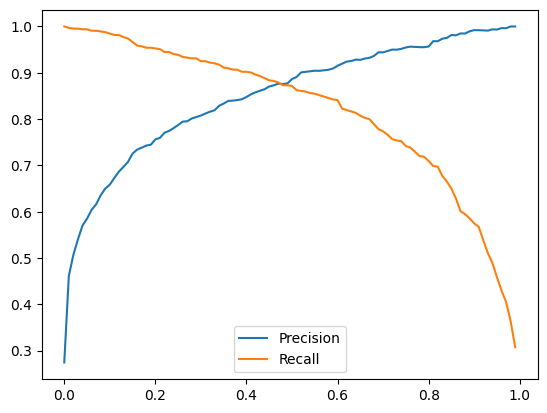

In [69]:
plt.plot(pr_scores_df["Threshold"], pr_scores_df["Precision"], label="Precision")
plt.plot(pr_scores_df["Threshold"], pr_scores_df["Recall"], label="Recall")
plt.legend()

Question 4

In [70]:
pr_scores_df["F1"] = 2 * (pr_scores_df["Precision"] * pr_scores_df["Recall"]) / (pr_scores_df["Precision"] + pr_scores_df["Recall"])

In [71]:
pr_scores_df.head()

,Threshold,Precision,Recall,F1
0,0.00,0.274444,1.000000,0.430688
1,0.01,0.461103,0.996942,0.630561
2,0.02,0.507009,0.995413,0.671827
3,0.03,0.540249,0.995413,0.700377
4,0.04,0.570175,0.993884,0.724638


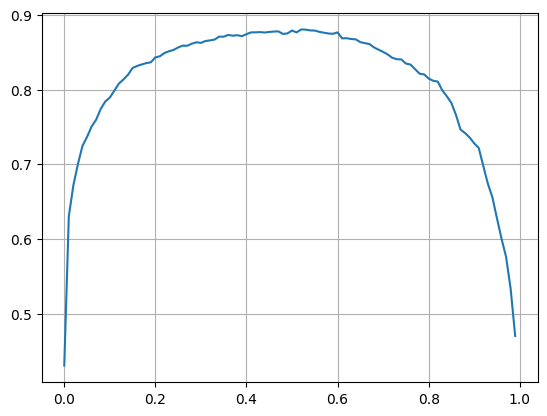

In [72]:
plt.plot(pr_scores_df["Threshold"], pr_scores_df["F1"])
plt.grid()

In [78]:
pr_scores_df.sort_values(by="F1", ascending=False).iloc[0,:]["Threshold"]

0.52

Question 5

In [79]:
from sklearn.model_selection import KFold 

In [80]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [81]:
def train_model(df, y, C=1.0):
    dicts = df.to_dict(orient="records")

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y)

    return dv, model 

In [82]:
def predict(df, dv, model):
    dicts = df.to_dict(orient="records")

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred 

In [86]:
scores = []

for train_idx, val_idx in kfold.split(filtered_df_full_train):
    df_train = filtered_df_full_train.iloc[train_idx]
    df_val = filtered_df_full_train.iloc[val_idx]

    y_train = df_train.above_average.values 
    y_val = df_val.above_average.values 

    df_train = df_train.drop("above_average", axis=1)
    df_val = df_val.drop("above_average", axis=1)

    dv, model = train_model(df_train, y_train)
    y_val_pred = predict(df_val, dv, model)

    auc_score = roc_auc_score(y_val, y_val_pred)
    scores.append(auc_score)

c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

In [87]:
scores 

[0.9753664439127685,
 0.9792285151954964,
 0.9821663599353078,
 0.9797780380346885,
 0.9819652569652569]

In [88]:
print(np.std(scores))

0.002458552924310313


In [89]:
n_splits = 5

for C in [0.01, 0.1, 0.5, 10]:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(filtered_df_full_train):
        df_train = filtered_df_full_train.iloc[train_idx]
        df_val = filtered_df_full_train.iloc[val_idx]

        y_train = df_train.above_average.values 
        y_val = df_val.above_average.values 

        df_train = df_train.drop("above_average", axis=1)
        df_val = df_val.drop("above_average", axis=1)

        dv, model = train_model(df_train, y_train, C=C)
        y_val_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_val_pred)
        scores.append(auc)

    print(f"C = {C} | Mean: {np.mean(scores):.3f} +- {np.std(scores):.3f}")
 

C = 0.01 | Mean: 0.952 +- 0.002
C = 0.1 | Mean: 0.972 +- 0.002


c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

C = 0.5 | Mean: 0.979 +- 0.003


c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

C = 10 | Mean: 0.980 +- 0.004


c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
